__Creating Normal Distribution Class__

In [9]:
from scipy.stats import norm
import seaborn as sns
#sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np

class Normal_Dist:
    
    #Initialise constructor
    def __init__(self, mean, sd):
        self.mean, self.sd = mean, sd
        
        
    # Create plot function    
    def visualise(self, colour):
        
        data = norm.rvs(size=10000,loc=self.mean,scale=self.sd)
        
        
        
        
        ax = sns.distplot(data, hist=False ,
                          #bins=100,
                          #kde=True,
                          color=colour,
                          hist_kws={"linewidth": 15,'alpha':1} , label='standard deviation: '+str(self.sd) )

        ax.set_xlim(0,max(data))
        ax.set(xlabel='x', ylabel='Frequency')
        plt.legend()
        
        
    # to calculate P(X > obs) , where X is the random variable, and obs represents a possible observed deviation
    # using the survival function norm.sf
    def probability(self, deviation):
        
        return norm.sf(deviation, self.mean, self.sd)
        
        
    
        
    

__Plotting example of Mediocristan and Extremistan__

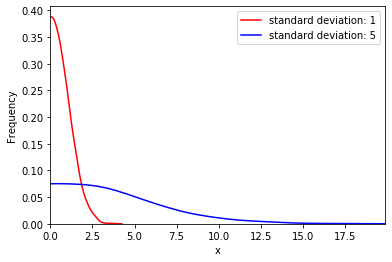

In [3]:
mediocre = Normal_Dist(0,1)

mediocre.visualise('red')

extreme = Normal_Dist(0,5)

extreme.visualise('blue')


The blue line represents a Gaussian with a standard deviation 5 times greater than that of the standard Gaussian. 

__Mediocristan__

In [28]:
deviation1 = 3*mediocre.sd

print('Mediocristan:\n')
print('a) P(X>{})P(X>{}) = {}'.format(deviation1,deviation1, mediocre.probability(deviation1)**2))
print('b) P(X>2*{}) = {}'.format(deviation1, mediocre.probability(deviation1*2)))
print('\na>b? : ' +str(mediocre.probability(deviation1)**2 > mediocre.probability(deviation1*2)))

Mediocristan:

a) P(X>3)P(X>3) = 1.8222246957988004e-06
b) P(X>2*3) = 9.865876450376946e-10

a>b? : True


Above, we confirm the results on page 22. 

__Recreating figure 3.1__

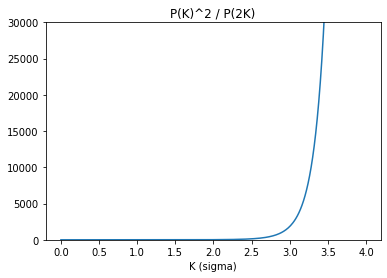

In [25]:
ratio = [mediocre.probability(i*mediocre.sd)**2 / mediocre.probability(i*mediocre.sd*2) for i in np.arange(0,4,0.01)]

plt.plot(np.arange(0,4,0.01),ratio)
plt.ylim(0, 30000)
plt.xlabel('K (sigma)')
plt.title('P(K)^2 / P(2K)')
plt.show()


The above graph shows that in mediocristan, for higher sigma events, it is increasingly more likely to observe K on 2 separate occasions, rather than a single observation of 2K. 

__Extremistan__

In [99]:
# Extremistan

deviation2 = 3*extreme.sd

print('Extremistan:\n')
print('P(X>{})P(X>{}) = {}'.format(deviation2,deviation2, extreme.probability(deviation2)**2))
print('P(X>2*{}) = {}'.format(deviation2, extreme.probability(deviation2*2)))
print('\na>b? : ' +str(extreme.probability(deviation2)**2 > extreme.probability(deviation2*2)))

Extremistan:

P(X>15)P(X>15) = 1.8222246957988004e-06
P(X>2*15) = 9.865876450376946e-10

a>b? : True


Should be getting false for this, seems a Gaussian with larger deviations doesn't satisfy a fat-tail distribution. Will update. 